## Install Packages into Virtual Environment

In [ ]:
!pip install pandas numpy scipy statsmodels seaborn matplotlib scikit-learn scikit-optimize

## I. Imports & Set Options

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)
pd.set_option('display.precision', 2)

## II. Import Dataset

In [16]:
path = 'C:/Users/andre/Job Portfolio Projects/Gaussian Naive Bayes/archive'

%cd $path

C:\Users\andre\Job Portfolio Projects\Gaussian Naive Bayes\archive


In [17]:
# Import data, make a copy of the original

df = pd.read_csv('heart.csv')
dfc1 = df.copy()
dfc1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## III. Check Characteristics of Dataset

In [18]:
# Get info & characteristics of dataset

dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Convert the 'object' data types to actual data type to save space in memory
# We saved 30.7 KB, almost 50%

categorical_lst = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for i, j in enumerate(categorical_lst):
    if i < 6:
        dfc1[j] = pd.Categorical(dfc1[j])
    
dfc1.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


## III. Split Dataset Into Categorical & Continuous Variables

In [19]:
# Create a seperate & smaller dataframe for categorical variables

dfc2a = pd.DataFrame(dfc1, columns=categorical_lst, copy=True)
dfc2a.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


In [20]:
# Create a seperate & smaller dataframe for our chosen variables. Use 'copy=True' so changes wont affect original

continuous_lst = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

dfc2b = pd.DataFrame(dfc1, columns=continuous_lst, copy=True)
dfc2b.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0


## IV. Check Model Assumptions

In [ ]:
# Check the Gaussian Naive-Bayes Assumptions
# - a. Normally distributed
# - b. Independent
# - c. Equal Variance

### a. Normally Distributed

0 Age
1 RestingBP
2 Cholesterol
3 MaxHR
4 Oldpeak
5 HeartDisease


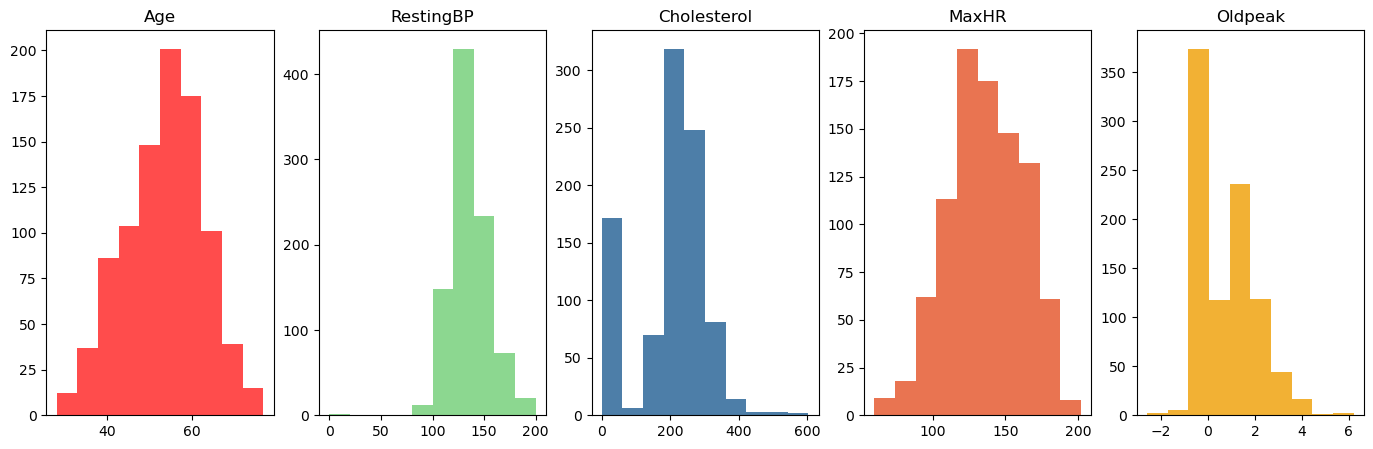

In [21]:
# visualize the distributions of each continuous variable before scaling
# OldPeak: is the measurement in MM of the downward depression of the ST segment relative to the baseline
# The distributions look relatively normally distributed

def histograms(features):
    fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(17, 5))
    ax = ax.flatten()
    colors = ['#FF4C4C', '#8CD790', '#4D7EA8', '#E97451',  '#F2B134']
    for i, feature in enumerate(features):
        print(i, feature)
        if feature != 'HeartDisease':
            ax[i].hist(dfc1[feature], color=colors[i])
            ax[i].set_title(feature)
    plt.show()
    
histograms(continuous_lst)

In [22]:
# Normaltest(X) is based on skewness & kutosis
# Reject the Null, data is not normal

from scipy.stats import normaltest

stat1, p1 = normaltest(dfc2b)

for i, feature in enumerate(dfc2b):
    if feature != 'HeartDisease':
        print(f"'{feature}'")
        print('Normal-Test Stat: ', stat1[i])
        print('p-value: ', p1[i], end='\n\n')
   


'Age'
Normal-Test Stat:  14.387278957845862
p-value:  0.0007513496172395723

'RestingBP'
Normal-Test Stat:  80.15332964094773
p-value:  3.934826751861588e-18

'Cholesterol'
Normal-Test Stat:  50.09695629245791
p-value:  1.3230740789245988e-11

'MaxHR'
Normal-Test Stat:  15.83254859125781
p-value:  0.0003647587814373257

'Oldpeak'
Normal-Test Stat:  139.06085036801633
p-value:  6.357992601318172e-31



In [23]:
# Shapiro-Wilk is based on the comparison of the observations and expected distribution
# Reject the Null, data is not normal

from scipy.stats import shapiro

for i, feature in enumerate(dfc2b):
    stat2, p2 = shapiro(dfc2b[continuous_lst[i]])
    if feature != 'HeartDisease':
        print(f"'{feature}'")
        print('Shapiro-Wilk Stat: ', stat2)
        print('p-value: ', p2, end='\n\n')


'Age'
Shapiro-Wilk Stat:  0.9910141825675964
p-value:  2.170366860809736e-05

'RestingBP'
Shapiro-Wilk Stat:  0.9580429196357727
p-value:  1.494997270036079e-15

'Cholesterol'
Shapiro-Wilk Stat:  0.8705925941467285
p-value:  6.972955704658339e-27

'MaxHR'
Shapiro-Wilk Stat:  0.9926717877388
p-value:  0.0001683219597907737

'Oldpeak'
Shapiro-Wilk Stat:  0.8598772287368774
p-value:  8.26949925434661e-28



### b. Independence for Continuous Input & Binary Output

<Axes: >

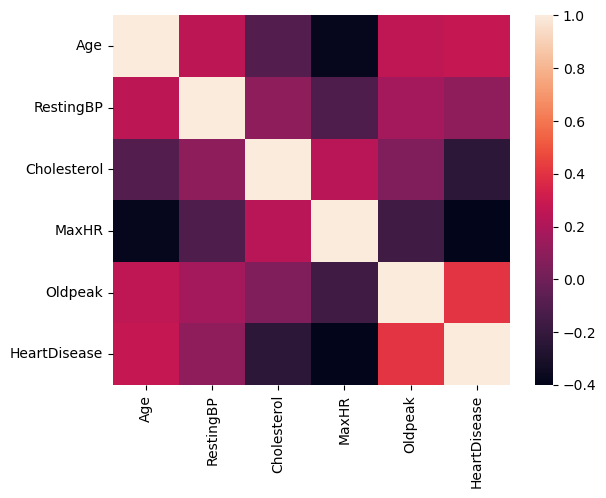

In [24]:
# - Correlation Matrix
# - Gives us an idea of the strength of the relationships between 'HeartDisease' and the continuous variables
# - It also gives us an idea of the multicolinearity present

corr_matrix = dfc2b.corr()
sns.heatmap(corr_matrix)

In [25]:
# - VIF: Variance inflation factor
# - If VIF over 5, suggests multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i, feature in enumerate(dfc2b):
    vif = variance_inflation_factor(dfc2b.values, i)
    print(f"{i} '{feature}'")
    print(f'VIF: {vif}',  end='\n\n')


0 'Age'
VIF: 30.048958230190813

1 'RestingBP'
VIF: 43.05227552605272

2 'Cholesterol'
VIF: 4.880954015444664

3 'MaxHR'
VIF: 20.456755555223047

4 'Oldpeak'
VIF: 2.1167386707432434

5 'HeartDisease'
VIF: 3.1137398605801807



### c. Equal Variance for Continuous Input & Binary Output

In [26]:
# - Check if distributions have equal variance
# - Reject Null, no equal variance

from scipy.stats import bartlett

# Perform Bartlett's test
for i, feature in enumerate(dfc2b):
    if feature != 'HeartDisease':
        stat3, p3 = bartlett(dfc2b[feature].values, dfc2b['HeartDisease'].values)
        print(f"'{feature}'")
        print(f'Bartlett Stat: {stat3}')
        print(f'p-value: {p3}', end='\n\n')

'Age'
Bartlett Stat: 4128.167288077162
p-value: 0.0

'RestingBP'
Bartlett Stat: 5360.505671594429
p-value: 0.0

'Cholesterol'
Bartlett Stat: 8615.235590247594
p-value: 0.0

'MaxHR'
Bartlett Stat: 5943.851214613202
p-value: 0.0

'Oldpeak'
Bartlett Stat: 488.37092476434
p-value: 3.2231574631283407e-108



In [27]:
# - Reject the Null, no equal variance

from scipy.stats import levene

for idx, feature in enumerate(dfc2b):
    if feature != 'HeartDisease':
        stat4, p4 = levene(dfc2b[feature].values, dfc2b['HeartDisease'].values)
        print(f"'{feature}'")
        print(f'Shapiro-Wilk Stat: {stat4}')
        print(f'p-value: {p4}', end='\n\n')

'Age'
Shapiro-Wilk Stat: 1453.4960779350117
p-value: 1.0444017411795531e-234

'RestingBP'
Shapiro-Wilk Stat: 1069.455098909459
p-value: 3.3937503883075907e-185

'Cholesterol'
Shapiro-Wilk Stat: 873.444641470111
p-value: 2.4853925396049344e-157

'MaxHR'
Shapiro-Wilk Stat: 1839.6882049265666
p-value: 5.7346653981515754e-279

'Oldpeak'
Shapiro-Wilk Stat: 221.73717173657982
p-value: 1.9848087558491322e-47



### d. Independence for Categorical Input & Categorical Output

In [28]:
# - Check for independence between inputs & target
# - Reject Null, no independence

import pandas as pd
from scipy.stats import chi2_contingency

for i, feature in enumerate(dfc2a):
    if feature != 'HeartDisease':
        contingency_table = pd.crosstab(dfc2a[feature], dfc2a['HeartDisease'])
        chi2, pval, dof, expected = chi2_contingency(contingency_table)
    
        print(f"'{feature}'")
        print(f'Degrees of Freedom: {dof}')
        print(f"Chi-square: {chi2}")
        print(f"p-value: {pval}", end='\n\n')
        

'Sex'
Degrees of Freedom: 1
Chi-square: 84.14510134633775
p-value: 4.597617450809164e-20

'ChestPainType'
Degrees of Freedom: 3
Chi-square: 268.06723902181767
p-value: 8.08372842808765e-58

'FastingBS'
Degrees of Freedom: 1
Chi-square: 64.3206790933594
p-value: 1.0573018731809955e-15

'RestingECG'
Degrees of Freedom: 2
Chi-square: 10.931469339140978
p-value: 0.0042292328167544925

'ExerciseAngina'
Degrees of Freedom: 1
Chi-square: 222.25938271530583
p-value: 2.907808387659878e-50

'ST_Slope'
Degrees of Freedom: 2
Chi-square: 355.91844319207905
p-value: 5.167637689470128e-78



## V. Check Input & Target Class Distribution Balance

M 0.789760348583878
F 0.210239651416122
ASY 0.5403050108932462
NAP 0.22113289760348584
ATA 0.18845315904139434
TA 0.05010893246187364
0 0.7668845315904139
1 0.23311546840958605
Normal 0.6013071895424836
LVH 0.2047930283224401
ST 0.19389978213507625
N 0.5958605664488017
Y 0.40413943355119825
Flat 0.5010893246187363
Up 0.43028322440087147
Down 0.06862745098039216
1 0.5533769063180828
0 0.4466230936819172


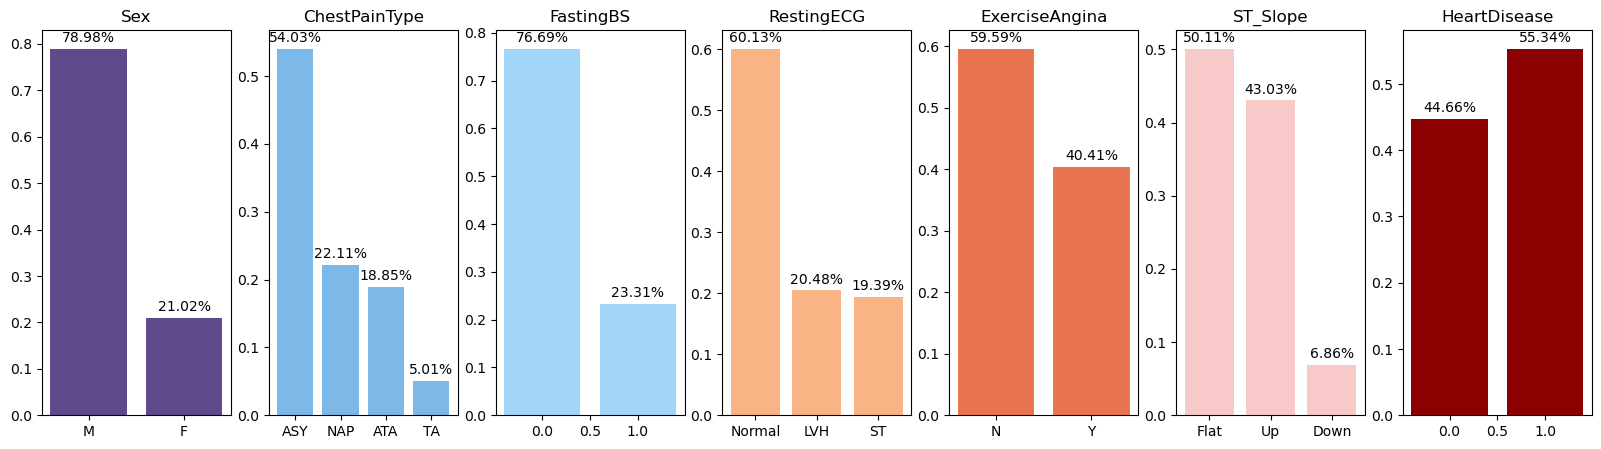

In [29]:
# Create a function that will calculate & display the probabilities withing each variable

def class_balance(df):
    colors = ['#5F4B8B', '#7CB9E8', '#A2D6F9', '#F9B384', '#E97451', '#F7CAC9', '#8B0000']
    fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(20,5))
    
    # - For each sub-plot
    for i, feature in enumerate(df.columns):
        prob = df[feature].value_counts()/len(df[feature])
        axes[i].bar(prob.index, prob, color = colors[i])
        axes[i].set_title(feature)
    
        # - For each bar in the current subplot
        # - Iterate over the unique categories of the current variable and their corresponding probabilities
        for cat, prob in zip(prob.index, prob):
            print(cat, prob)
            # - Annotate the current bar with its corresponding probability
            axes[i].annotate(f"{prob:.2%}", xy=(cat, prob), xytext=(0, 5), ha='center', textcoords='offset points', 
                                 fontsize=10)

       
    
# Apply the function to categorical dataframe

class_balance(dfc2a)



## VI. Compare Categories With Target Variable

In [30]:

# - Comparing Categories will allow us to get a better idea of how our input variables affect the target variable

def visualize(data, feature, colors):
    
    ax = pd.crosstab(data[feature], data.HeartDisease, normalize=0).plot(kind='bar', color=colors, 
                                                                          figsize=(15, 5), label='Inline label')
    plt.legend(title='Y', bbox_to_anchor=(0., 1.02, 1., .102), 
               labels=[f'No Heart Disease', 'Heart Disease'], 
               loc='upper right', mode='expand', ncols=2, borderaxespad=0.)
    plt.title(feature, fontsize=14)
    plt.xticks(rotation=-60, fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    
    for i, patch in enumerate(ax.patches):
        print(i, patch)
        value = f"{patch.get_height() * 100:.2f}%"
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=10)

        

0 Rectangle(xy=(-0.25, 0), width=0.25, height=0.740933, angle=0)
1 Rectangle(xy=(0.75, 0), width=0.25, height=0.368276, angle=0)
2 Rectangle(xy=(0, 0), width=0.25, height=0.259067, angle=0)
3 Rectangle(xy=(1, 0), width=0.25, height=0.631724, angle=0)


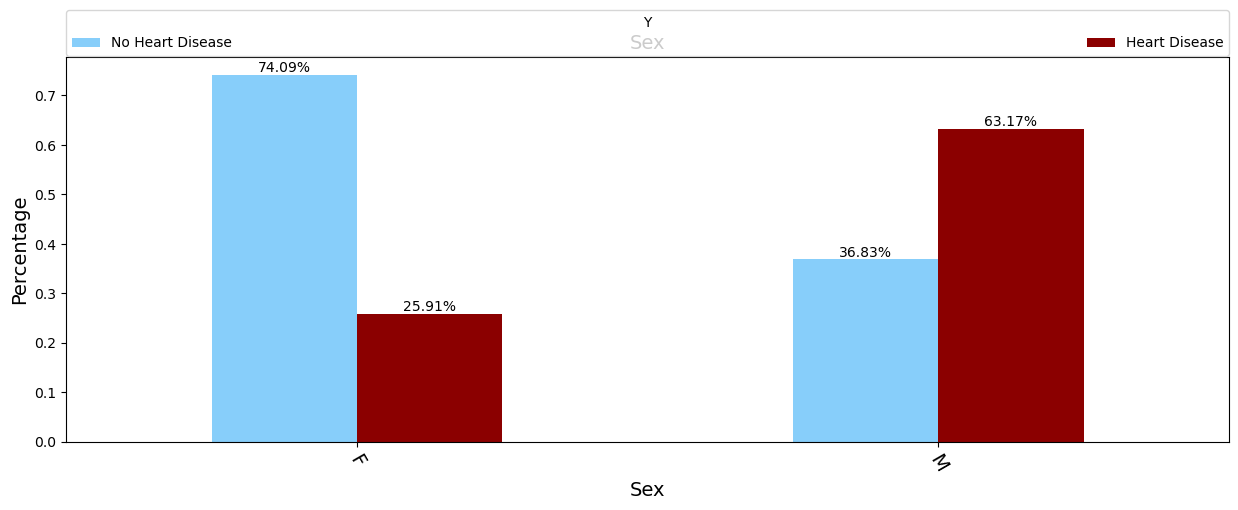

In [31]:
# Sex -vs- HeartDisease

colors = ['#87CEFA', '#8B0000']
visualize(dfc1, 'Sex', colors )

# - We can see about 63% of males and 23% of females have heart disease


0 Rectangle(xy=(-0.25, 0), width=0.25, height=0.209677, angle=0)
1 Rectangle(xy=(0.75, 0), width=0.25, height=0.861272, angle=0)
2 Rectangle(xy=(1.75, 0), width=0.25, height=0.64532, angle=0)
3 Rectangle(xy=(2.75, 0), width=0.25, height=0.565217, angle=0)
4 Rectangle(xy=(0, 0), width=0.25, height=0.790323, angle=0)
5 Rectangle(xy=(1, 0), width=0.25, height=0.138728, angle=0)
6 Rectangle(xy=(2, 0), width=0.25, height=0.35468, angle=0)
7 Rectangle(xy=(3, 0), width=0.25, height=0.434783, angle=0)


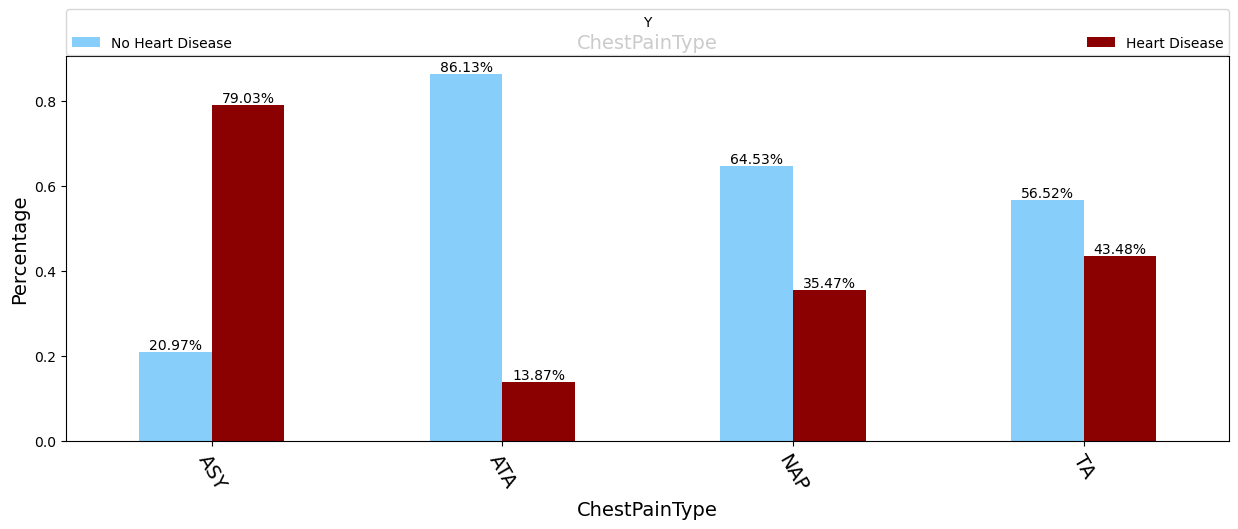

In [32]:
# ChestPainType -vs- HeartDisease

colors = ['#87CEFA', '#8B0000']
visualize(dfc1, 'ChestPainType', colors)

0 Rectangle(xy=(-0.25, 0), width=0.25, height=0.43617, angle=0)
1 Rectangle(xy=(0.75, 0), width=0.25, height=0.483696, angle=0)
2 Rectangle(xy=(1.75, 0), width=0.25, height=0.342697, angle=0)
3 Rectangle(xy=(0, 0), width=0.25, height=0.56383, angle=0)
4 Rectangle(xy=(1, 0), width=0.25, height=0.516304, angle=0)
5 Rectangle(xy=(2, 0), width=0.25, height=0.657303, angle=0)


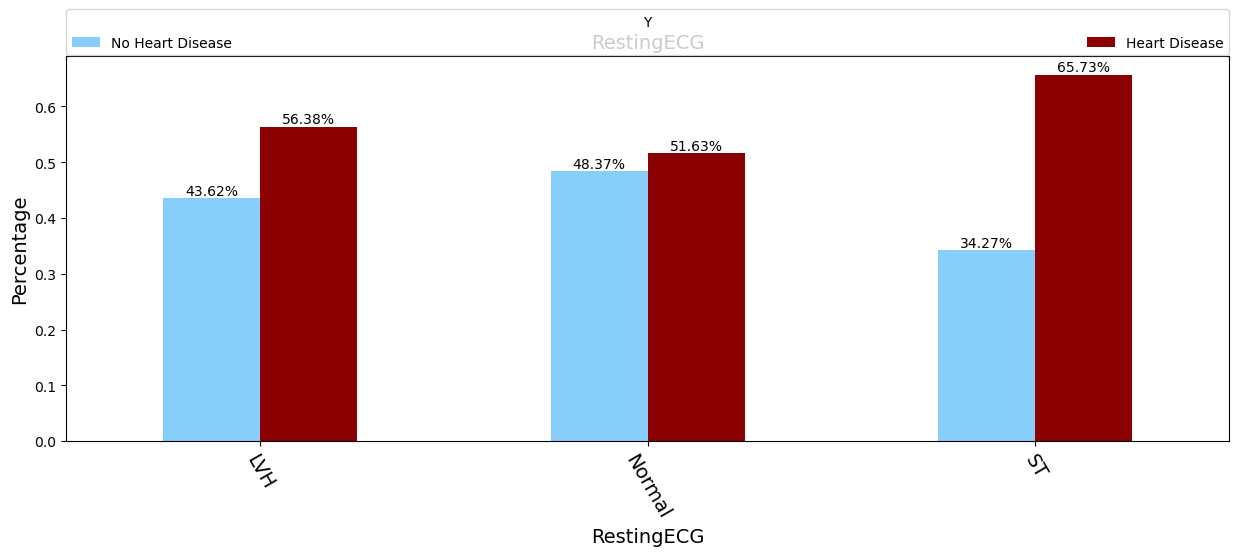

In [33]:
# RestingECG -vs- HeartDisease

colors = ['#87CEFA', '#8B0000']
visualize(dfc1, 'RestingECG', colors)

0 Rectangle(xy=(-0.25, 0), width=0.25, height=0.648995, angle=0)
1 Rectangle(xy=(0.75, 0), width=0.25, height=0.148248, angle=0)
2 Rectangle(xy=(0, 0), width=0.25, height=0.351005, angle=0)
3 Rectangle(xy=(1, 0), width=0.25, height=0.851752, angle=0)


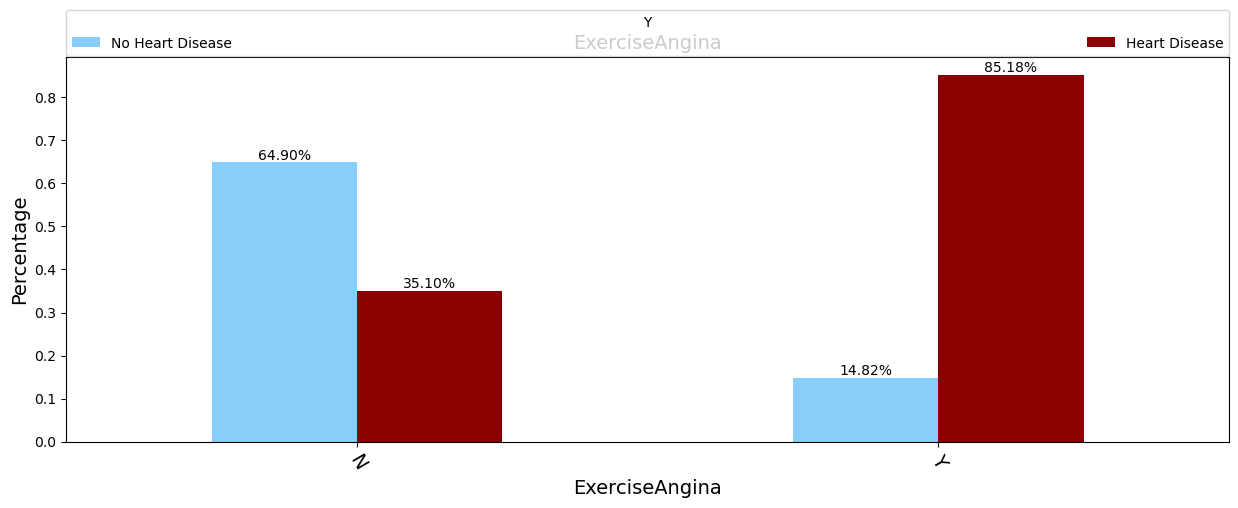

In [34]:
# ExerciseAngina -vs- HeartDisease
# Those who have exercise angina and who do or do not have heart disease

colors = ['#87CEFA', '#8B0000']
visualize(dfc1, 'ExerciseAngina', colors)

0 Rectangle(xy=(-0.25, 0), width=0.25, height=0.222222, angle=0)
1 Rectangle(xy=(0.75, 0), width=0.25, height=0.171739, angle=0)
2 Rectangle(xy=(1.75, 0), width=0.25, height=0.802532, angle=0)
3 Rectangle(xy=(0, 0), width=0.25, height=0.777778, angle=0)
4 Rectangle(xy=(1, 0), width=0.25, height=0.828261, angle=0)
5 Rectangle(xy=(2, 0), width=0.25, height=0.197468, angle=0)


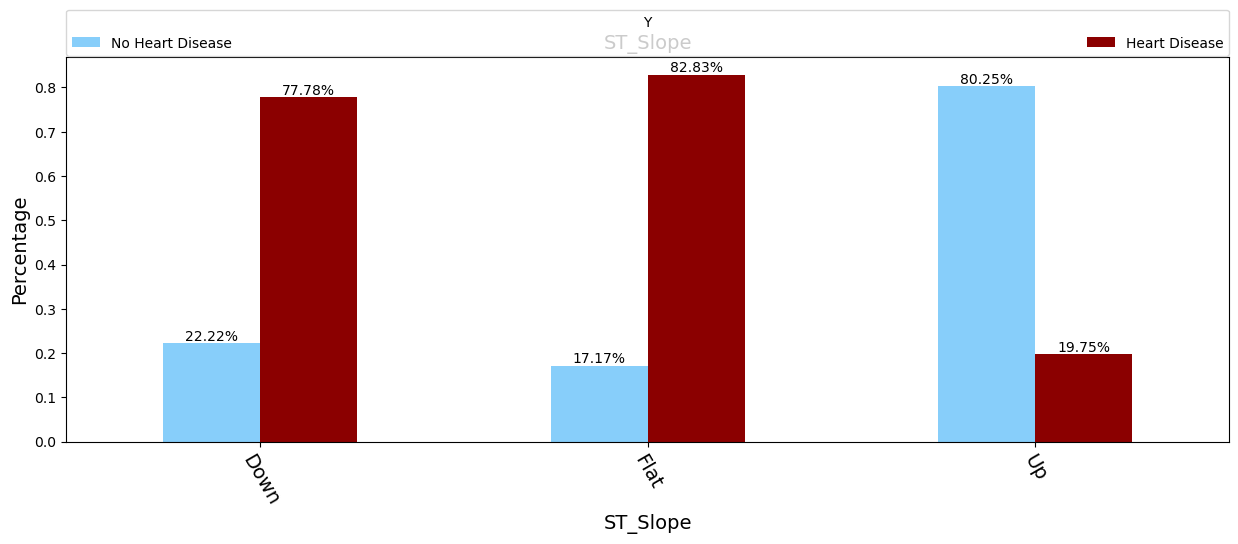

In [35]:
# ST_Slope -vs- HeartDisease
# if elevated, conditions such as myocardial infarction, or pericarditis
# if flat, considered normal
# if depressed,conditions like ischemia, digitalis toxicity, or other conditions.

colors = ['#87CEFA', '#8B0000']
visualize(dfc1, 'ST_Slope', colors)

## VII. Encode Categorical Variables with OrdinalEncoder() & .replace()

In [36]:
# - Ordinal encode 'ChestPainType', 'RestingECG' & 'ST_Slope' in-place

from sklearn.preprocessing import OrdinalEncoder

# Update lst3 to match the actual categories in column 2 in order of importance
ordinal_lst = [['TA', 'ATA', 'NAP', 'ASY'], ['Normal', 'ST', 'LVH'], ['Down', 'Flat', 'Up']]

# Create the encoder with the updated categories
encoder = OrdinalEncoder(categories=ordinal_lst)

# Specify the columns to encode
cols_to_encode = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Fit and transform the specified columns
dfc2a[cols_to_encode] = encoder.fit_transform(dfc2a[cols_to_encode])

# Display the updated dataframe
dfc2a.head()



,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,1.0,0,0.0,N,2.0,0
1,F,2.0,0,0.0,N,1.0,1
2,M,1.0,0,1.0,N,2.0,0
3,F,3.0,0,0.0,Y,1.0,1
4,M,2.0,0,0.0,N,2.0,0


In [37]:
# - Binary encode 'Sex', 'ExerciseAngina' in-place, then make a copy()

for feature in dfc2a:
    if feature == 'Sex':
        dfc2a[feature] = dfc2a[feature].replace({'M': 1, 'F': 0})
    elif feature == 'ExerciseAngina':
        dfc2a[feature] = dfc2a[feature].replace({'Y': 1, 'N': 0})

dfc2a_enc = dfc2a.copy()

dfc2a_enc.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1,1.0,0,0.0,0,2.0,0
1,0,2.0,0,0.0,0,1.0,1
2,1,1.0,0,1.0,0,2.0,0
3,0,3.0,0,0.0,1,1.0,1
4,1,2.0,0,0.0,0,2.0,0


In [38]:
# Check datatypes to ensure they are all numeric in nature

dfc2a_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    int64  
 1   ChestPainType   918 non-null    float64
 2   FastingBS       918 non-null    int64  
 3   RestingECG      918 non-null    float64
 4   ExerciseAngina  918 non-null    int64  
 5   ST_Slope        918 non-null    float64
 6   HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 50.3 KB


In [39]:
# - Change category --> integer

for feature in dfc2a:
    if feature == 'Sex' or feature == 'FastingBS' or feature == 'ExerciseAngina':
        dfc2a_enc[feature] = dfc2a_enc[feature].astype('int64')
    
dfc2a_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    int64  
 1   ChestPainType   918 non-null    float64
 2   FastingBS       918 non-null    int64  
 3   RestingECG      918 non-null    float64
 4   ExerciseAngina  918 non-null    int64  
 5   ST_Slope        918 non-null    float64
 6   HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 50.3 KB


## VIII. Check for Outliers

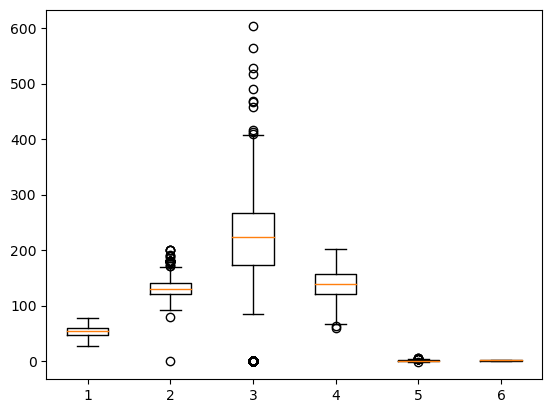

In [40]:
# - Check for outliers in continuous data

plt.boxplot(dfc2b)
plt.show()

In [41]:
# - Find index where 'RestingBP' == 0 | 'Cholesterol' == 0
# - 172 instances where cholesterol is zero or resting BP is zero
# - We will leave them in for the first iteration of the model to asses baseline performance

len(df) - len(dfc2b.loc[(dfc2b['RestingBP'] == 0) | (dfc2b['Cholesterol'] == 0)])

746

## IX. Scale Continuous Data Using RobustScaler()

In [42]:
# - Since there are some outliers, its best to use a robust scaling technique
# - It scales with the IQR and gets rid of the median.
# - Promotes fairness by not giving importance to any feature based on its original scale

from sklearn.preprocessing import RobustScaler

# Create an instance of RobustScaler
scaler = RobustScaler()

# Fit and transform the selected columns using RobustScaler
dfc2bs = scaler.fit_transform(dfc2b[continuous_lst])

# Change back to Pandas dataframe

dfc2bs = pd.DataFrame(dfc2bs, columns=continuous_lst)
dfc2bs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,-1.08,0.5,0.70,0.94,-0.40,-1.0
1,-0.38,1.5,-0.46,0.50,0.27,0.0
2,-1.31,0.0,0.64,-1.11,-0.40,-1.0
3,-0.46,0.4,-0.10,-0.83,0.60,0.0
4,0.00,1.0,-0.30,-0.44,-0.40,-1.0


In [60]:
# - During the encoding of the continuous variables, 'HeartDisease' was turned negative
# - Therefore, we need to correct it

dfc2bs['HeartDisease'] = dfc2bs['HeartDisease'].replace({-1: 1})
dfc2bs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,-1.08,0.5,0.70,0.94,-0.40,1.0
1,-0.38,1.5,-0.46,0.50,0.27,0.0
2,-1.31,0.0,0.64,-1.11,-0.40,1.0
3,-0.46,0.4,-0.10,-0.83,0.60,0.0
4,0.00,1.0,-0.30,-0.44,-0.40,1.0


In [61]:
# - View categorical data
dfc2a_enc.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,1,1.0,0,0.0,0,2.0
1,0,2.0,0,0.0,0,1.0
2,1,1.0,0,1.0,0,2.0
3,0,3.0,0,0.0,1,1.0
4,1,2.0,0,0.0,0,2.0


In [45]:
# - Need to drop the target variable from the categorical dataframe to prepare for merging

dfc2a_enc = dfc2a_enc.drop('HeartDisease', axis=1)
dfc2a_enc.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,1,1.0,0,0.0,0,2.0
1,0,2.0,0,0.0,0,1.0
2,1,1.0,0,1.0,0,2.0
3,0,3.0,0,0.0,1,1.0
4,1,2.0,0,0.0,0,2.0


In [62]:
# - Merge both dataframes

# - left-merge Continuous dataframe on 'ST_Slope'

dfc2m1 = pd.merge(dfc2a_enc, dfc2bs, left_index=True, right_index=True, how='left')

# - Create a copy

dfc3m1 = pd.DataFrame(dfc2m1, columns=dfc2m1.columns, copy=True)
dfc3m1.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,1,1.0,0,0.0,0,2.0,-1.08,0.5,0.70,0.94,-0.40,1.0
1,0,2.0,0,0.0,0,1.0,-0.38,1.5,-0.46,0.50,0.27,0.0
2,1,1.0,0,1.0,0,2.0,-1.31,0.0,0.64,-1.11,-0.40,1.0
3,0,3.0,0,0.0,1,1.0,-0.46,0.4,-0.10,-0.83,0.60,0.0
4,1,2.0,0,0.0,0,2.0,0.00,1.0,-0.30,-0.44,-0.40,1.0


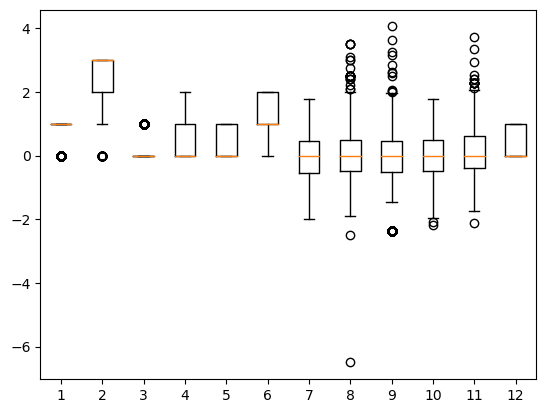

In [63]:
# - Check outliers after scaling to see if any improvement
# - The continuous data is now scaled between the ranges of approx. (-2 to 4)
# - This mitigates the impact of outliers on the model

plt.boxplot(dfc3m1)
plt.show()

## X. Split Data into Train, Validate, & Test Sets Using Numpy Arrays

In [64]:
# - Split data into X matrix & y matrix
# - This is the full set of categorical & continuous features

X, y = dfc3m1.iloc[0:, :-1], dfc3m1.iloc[0:, -1]


In [65]:
# - Further split the matrices into the train, validation, and test data sets

from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (temp_set refers to the remaining data)

X_train, temp_set, y_train, y_temp = train_test_split(X, y, test_size=0.33, shuffle=False)

# Split the temporary set into validation and test sets

X_val, X_test, y_val, y_test = train_test_split(temp_set, y_temp, test_size=0.5, shuffle=False)


X_train, y_train = X_train.values, y_train.values
X_val, y_val = X_val.values, y_val.values
X_test, y_test = X_test.values, y_test.values

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)




(615, 11) (615,)
(151, 11) (151,)
(152, 11) (152,)


## XI. Build Baseline Model & Optimize Parameters

In [57]:
# - Train a baseline model
# - We now want to build the best baseline model we can, and use it to compare and contrast other models.

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay 
from skopt import BayesSearchCV 
from skopt.plots import plot_objective
from warnings import catch_warnings
from warnings import simplefilter



# Define a function for hyperparameter optimization
def optimize_model(X, y, model, param_space, cv):

    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=50,  # Number of iterations
        cv=cv,  # Stratified k-fold cross-validation
        scoring='roc_auc',  # Scoring metric to optimize
        random_state=42,
        n_jobs=-1  # Use all available CPU cores
    )
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        opt.fit(X, y)
    
   
    best_model = opt.best_estimator_
    val_score = best_model.score(X_val, y_val)
    print("Validation Score:", val_score)
    print("Best Model:", best_model)
    print("Best Score:", opt.best_score_)
    # Print coefficients of the best model
    print("Coefficients:", best_model.coef_, end='\n\n')



In [51]:

# - Create a function that will display the confusion matrix, and report

def report(y_test, y_pred):
    # Evaluate the model's performance
    classification_report_result = classification_report(y_test, y_pred)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    print("Classification Report:\n", classification_report_result)
    print(cm)
    

In [58]:

# - Create a function that trains the model. The 'flag' variable is set to 'y', when we do not want to optimize

def train_model(X_train, y_train, X_test, y_test, flag):
    # Create an instance of the baseline model (e.g., Logistic Regression)
    baseline_model = LogisticRegression()

    # Train the model using the training data
    baseline_model.fit(X_train, y_train)
    
    # Use the trained model to make predictions on the test data
    y_pred = baseline_model.predict(X_test)

    report(y_test, y_pred)

    if flag == 'y':
        lst = []
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
        scores = cross_val_score(baseline_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score = 'raise')
        score = np.mean(scores)
        lst.append(score)
        
        # Performance metrics
        print('> ROC_AUC: Mean %.3f StanDev: %.3f StandErr: %.3f  Max: %.3f  Min: %.3f Range: %.3f' 
               % (np.mean(lst), np.std(lst), np.std(lst)/np.sqrt(50), max(lst), min(lst), max(lst) - min(lst)), end='\n\n' )
        
        
    
    
    return baseline_model


In [53]:
# Define the parameter space for hyperparameter optimization
def param_space(regularization, penalty, solver):
    param_space = {
        'C': regularization,  # Regularization parameter
        'penalty': penalty,   # Regularization penalty
        'solver': solver,     # Solver for optimization
    }
    return param_space


Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76        69
         1.0       0.80      0.82      0.81        83

    accuracy                           0.79       152
   macro avg       0.79      0.79      0.79       152
weighted avg       0.79      0.79      0.79       152

> ROC_AUC: Mean 0.851 StanDev: 0.000 StandErr: 0.000  Max: 0.851  Min: 0.851 Range: 0.000

Validation Score: 0.8079470198675497
Best Model: LogisticRegression(C=0.5, penalty='l1', solver='saga')
Best Score: 0.8394841269841269
Coefficients: [[-1.18468524 -0.87070417  0.         -0.12832545  0.          0.
   0.         -0.32950255 -0.19320686  0.85435951 -0.60178587]]



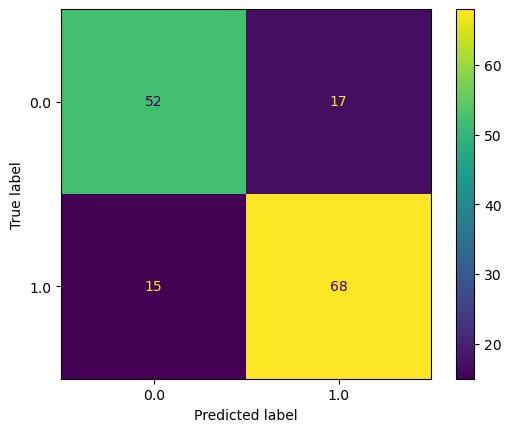

In [59]:
# - Precision: the proportion of correctly predicted positive instances out of all that were predicted positive. Good 
#              to focus on precision for medical diagnosis. Measures the quality of the positive predictions and how 
#              accurate or 'precise' the predictions are
#              formula: TP/TP + FP

# - Recall(sensitivity): the proportion of actual positive instances that are correctly identified or 'recalled' by
#                        the model. Recall quantifies the ability of the model to 'recall', 'identify', or 'capture'
#                        positive instances from the dataset.
#                        formula: TP/TP + FN

# - Support: is equivalent to 'n'
# - Accuracy: the proportion of correctly classified instances out of the entire dataset


# - As we can see the baseline model performs pretty well on its face.
# - The model is 79% accurate, implying that 7.9 out every 10 cases of heart-failure were identified correctly 
# - Please note the data that is used comes from the testing data set, which is data the model has never seen before 
# - The next step will be to create different types of classifiers such as decision trees, and naive.bayes to see
#   if there are more suited models for our task.


reg = (0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10.0)
pen = ['l1', 'l2']
solve = ['liblinear', 'saga']

baseline_model = train_model(X_train, y_train, X_test, y_test, 'y')

p_space = param_space(reg, pen, solve)

optimize_model(X_val, y_val, baseline_model, p_space, 10)
